https://www.python.org/downloads/release/python-364/

In [1]:
import phonetic
import corpus
import generate_sample
import verse
import re
import nltk
import importlib
import string
import seaborn
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
nltk.download('cmudict')
nltk.download('gutenberg')
dictionary = phonetic.PhoneticDictionary()
dictionary.import_file("data/cmudict/cmudict-0.7b")

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\Marissa\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Marissa\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Corpus text: 547 words, 256 unique

Template length:  53 syllables, 37 words

Template:
How does a bastard, orphan, son of a whore and a scotsman, dropped in the middle of a forgotten spot in the caribbean by providence, impoverished, in squalor, grow up to be a hero and a scholar?

Stress pattern:
 #  #  /  #  /,  #  /,  #  #  /  #  /  /  #  /,  #  /  /  #  /  #  /  /  #  /  #  /  /  /  #  /  /  #  #  /  /,  /  #  /,  /  #  /,  #  #  #  #  /  #  /  /  /  #  /, 

Desired number of match pairs: 5.0

Number of nonzero indices: 236

Percentile for cutoff: 98.0
Cutoff score:  0.9533233539410668

Pairs to match (7):
  95.9 % match: syllable 2 of orphan + syllable 3 of forgotten 
	 6 , 24
  96.7 % match: syllable 2 of scotsman + syllable 3 of forgotten 
	 14 , 24
  95.8 % match: syllable 2 of forgotten + syllable 1 of spot 
	 23 , 25
  95.3 % match: syllable 1 of caribbean + syllable 2 of squalor 
	 28 , 41
  95.3 % match: syllable 1 of caribbean + syllable 2 of scholar 
	 28 , 52
  96.3 % m

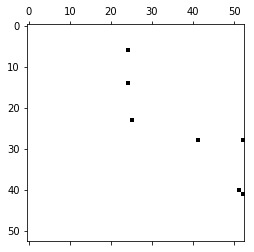

In [3]:
importlib.reload(corpus)
importlib.reload(phonetic)
importlib.reload(generate_sample)
importlib.reload(verse)

corp = corpus.WordCorpus(dictionary)
corp.initialize("alexander_hamilton.txt")

template = verse.VerseTemplate(verse.get_sample(1), dictionary, 
                               breakrules='phrase')
template.get_rhyme(verbose=True)
plt.spy(template.rhyme_matrix)
plt.show()

In [13]:
importlib.reload(corpus)
importlib.reload(phonetic)
importlib.reload(generate_sample)
importlib.reload(verse)

corp = corpus.WordCorpus(dictionary)
corp.initialize("alexander_hamilton.txt")
corp.initializeMatrix()

to_add = ["sick", "quick", "hurricane", "brain", "pain", "drain"]
locs = [4, 8, 19, 27, 31, 40]

def make_template():

    template = verse.VerseTemplate(verse.get_sample(4), dictionary, 
                                   breakrules="phrase")
    template.get_rhyme()
    for i in range(len(to_add)):
        template.add_word(corp.wordList[corp.wordDict[to_add[i]]], locs[i])
    return template
        
template = make_template()
print("\nTemplate text:", verse.get_sample(4))
print("\nNumber of syllables in template: ", template.num_syllables)
print("\nInitial template bones:", template.join_template())
print("\nResults:")

for i in range(3):
    print(generate_sample.fill_template(corp, make_template(), verbose=False, 
                                    get_rhymes=False))

Corpus text: 547 words, 256 unique

Template text: buddy you're a boy make a big noise, playing in the street, gonna be a big man some day, you got mud on your face, you big disgrace, kicking your can all over the place

Number of syllables in template:  41

Initial template bones:  #  /  #  / sick  #  /  # quick,  #  /  /  /  #,  #  /  #  /  # hurricane,  #  #  #  #  # brain,  #  #  / pain,  #  /  #  #  #  #  /  / drain 

Results:

 0: is, 1: in, 2: their, 3: own, 4: sick, 5: the, 6: cousin, 8: quick, 9: moved, 10: in, 11: the, 12: bottom, 14: his, 15: were, 16: being, 18: a, 19: hurricane, 22: came, 23: and, 24: kept, 25: a, 26: his, 27: brain, 28: and, 29: alex, 31: pain, 32: well, 33: the, 34: word, 35: got, 36: a, 37: scholar, 39: the, 40: drain,  

is in their own sick the cousin quick, moved in the bottom, his were being a hurricane, came and kept a his brain, and alex pain, well the word got a scholar the drain 

 0: is, 1: in, 2: their, 3: own, 4: sick, 5: the, 6: cousin, 8: q

In [188]:
importlib.reload(corpus)
importlib.reload(phonetic)
importlib.reload(generate_sample)
importlib.reload(verse)

corp = corpus.WordCorpus(dictionary)
corp.initialize("alexander_hamilton.txt")
corp.initializeMatrix()
corp.initializeSylDict()


template = verse.VerseTemplate(verse.get_sample(6), dictionary,
                              breakrules='phrase')
template.get_rhyme(verbose=True)

generate_sample.fill_template(corp, template)

Corpus text: 547 words, 256 unique

Template length:  42 syllables, 37 words

Template:
My mistress eyes' are nothing like the sun.
Coral is far more red than her lips red.
If snow be white, why then her breasts are dun.
If hair be wires, black wires grow on her head.

Stress pattern:
 #  #  /  #  #  #  /  #  /  #,  #  /  #  #  #  #  #  /  #  #,  #  #  #  #,  #  #  /  #  #  #,  #  #  #  #  /,  #  #  /  #  #  /  #, 

Desired number of match pairs: 4.0

Number of nonzero indices: 412

Percentile for cutoff: 99.0
Cutoff score:  0.9504366923132399

Pairs to match (5):
  95.3 % match: syllable 1 of sun + syllable 1 of dun 
	 9 , 29
  95.0 % match: syllable 1 of coral + syllable 1 of more 
	 10 , 14
  95.8 % match: syllable 1 of snow + syllable 1 of grow 
	 21 , 38
  100.0 % match: syllable 1 of why + syllable 1 of wires 
	 24 , 33
  100.0 % match: syllable 1 of why + syllable 1 of wires 
	 24 , 36

Fill 5 rhyme pairs:


   Get a match for at syllables 9 and 29
	Both currently empty, pick bo

'cane and carted away across the world, is insane man took up from the ten done, but split full of, it to the same oh the, guard up to the world, is gonna know your name  #, '